In [1]:
import numpy as np
import pandas as pd
data0 = pd.read_csv('26feature.csv', index_col = None)
data0.head(2)

,sigle-atom,MagpieData minimum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData maximum CovalentRadius,...,packing fraction,sine coulomb matrix eig 0,sine coulomb matrix eig 3,sine coulomb matrix eig 5,sine coulomb matrix eig 6,sine coulomb matrix eig 8,sine coulomb matrix eig 11,SOAP_40,magmom,theoretical
0,3.736,55,33,77.0,862.573333,632.284444,8,13.333333,3.555556,132,...,0.073556,1491.101695,1202.240174,395.637373,380.398375,344.328015,361.301567,0.0,15.253,4
1,3.057,49,46,77.0,833.533333,897.644444,11,13.000000,4.666667,139,...,0.082227,2643.665053,966.679995,66.533883,0.000000,0.000000,0.000000,0.0,5.822,3


In [2]:
data_corre = data0.corr()['magmom'].abs().sort_values(ascending=False)[:10]
data_corre

magmom                               1.000000
theoretical                          0.884006
sigle-atom                           0.880524
SOAP_40                              0.559469
MagpieData maximum CovalentRadius    0.404913
vpa                                  0.328050
MagpieData mode NdUnfilled           0.283217
MagpieData range MendeleevNumber     0.264194
packing fraction                     0.256852
MagpieData mean SpaceGroupNumber     0.227818
Name: magmom, dtype: float64

In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import math

In [4]:
y = data0['magmom'].values
excluded = ['magmom', 'theoretical']
X = data0.drop(excluded,axis=1)

print("There are %s possible dedscriptor:\n"%X.shape[1])
print('%s'%X.columns.values)

There are 25 possible dedscriptor:

['sigle-atom' 'MagpieData minimum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData mean MeltingT' 'MagpieData avg_dev MeltingT'
 'MagpieData range Column' 'MagpieData mean Column'
 'MagpieData avg_dev Column' 'MagpieData maximum CovalentRadius'
 'MagpieData mode NdUnfilled' 'MagpieData range NUnfilled'
 'MagpieData mean NUnfilled' 'MagpieData avg_dev NUnfilled'
 'MagpieData mode GSmagmom' 'MagpieData mean SpaceGroupNumber' 'vpa'
 'packing fraction' 'sine coulomb matrix eig 0'
 'sine coulomb matrix eig 3' 'sine coulomb matrix eig 5'
 'sine coulomb matrix eig 6' 'sine coulomb matrix eig 8'
 'sine coulomb matrix eig 11' 'SOAP_40']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
crossvalidation = KFold(n_splits = 10, shuffle = True, random_state = 18)

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(X_train)

StandardScaler()

In [8]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [9]:
np.mean(X_train_s, axis = 0)

array([-2.90254386e-17, -1.04491579e-16,  2.14788245e-16,  6.54523639e-16,
       -1.48029737e-16,  2.03178070e-16, -1.07394123e-16,  2.64131491e-16,
       -2.14788245e-16, -3.13474736e-16, -2.90254386e-17,  5.22457894e-17,
       -1.03040307e-16,  9.50583113e-17,  5.80508771e-18,  2.59777675e-16,
        4.52796841e-16,  3.48305263e-17, -3.48305263e-17,  5.80508771e-17,
       -5.22457894e-17,  3.77330701e-17,  3.48305263e-17, -2.90254386e-17,
       -3.48305263e-17])

In [10]:
np.std(X_train_s, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
np.mean(X_test_s, axis = 0)

array([-0.04496025,  0.06189941, -0.06470864,  0.09007217, -0.01687883,
        0.11711861,  0.08911442, -0.04505144, -0.03635338, -0.01616139,
       -0.01675811,  0.1851151 ,  0.06613873,  0.07889197,  0.02042757,
       -0.02564746, -0.11890551, -0.00759805, -0.07703104, -0.02451289,
       -0.03869843, -0.00407516, -0.13054718, -0.18364648, -0.04119705])

In [12]:
np.std(X_test_s, axis = 0)

array([0.92112098, 0.70453526, 0.79904247, 0.74285677, 0.84583613,
       1.11739239, 0.98720631, 1.05205347, 0.91499   , 0.91199662,
       0.90007863, 0.9955284 , 0.80969586, 0.94865501, 0.7083873 ,
       1.0003837 , 0.93993893, 1.01332324, 1.03025227, 1.00800629,
       0.87725754, 0.96091437, 0.43612349, 0.170932  , 0.90625301])

In [13]:
X = StandardScaler().fit_transform(X)
X

array([[ 1.11935603,  0.37943331, -0.67011158, ...,  0.239375  ,
         0.87399405, -0.3572248 ],
       [ 0.61905118, -0.05631769,  0.27775363, ..., -0.21386742,
        -0.20574847, -0.3572248 ],
       [-1.21417188, -2.96132438,  2.61096031, ..., -0.12051994,
        -0.20574847, -0.3572248 ],
       ...,
       [-1.16627819,  1.54143599, -1.39923867, ..., -0.21386742,
        -0.20574847, -0.3572248 ],
       [-1.22596109, -0.41944352,  0.56940447, ...,  0.28165126,
         0.88391202, -0.3572248 ],
       [-1.33722182,  1.54143599, -1.25341325, ..., -0.21386742,
        -0.20574847, -0.3572248 ]])

In [14]:
#import warnings
#warnings.filterwarnings("ignore")

#model = MLPRegressor(shuffle=True, random_state=25)
#tuned_parameters = [
#    {"hidden_layer_sizes": [(400,),(400,200),(400,400,200)], "activation":["relu","logistic","tanh"],
#     "learning_rate_init":[0.001,0.01,0.1],"max_iter":[200,300,400]
#    },]
#dnn_kf = GridSearchCV(model, tuned_parameters, cv = crossvalidation, return_train_score=False)
#dnn_kf.fit(X_train_s, y_train)

In [15]:
#dnn_kf.best_score_

In [16]:
#dnn_kf.best_params_

In [17]:
#dnn_kf.score(X_test_s, y_test)

In [19]:
import warnings
warnings.filterwarnings("ignore")

model_ANN = MLPRegressor(shuffle=True, random_state=66,
                         activation = 'relu', hidden_layer_sizes = (400, 400, 200),
                         learning_rate_init = 0.001, max_iter = 200)
r2_scores_ann = cross_val_score(model_ANN, X_train_s, y_train, scoring = 'r2',
                                 cv = crossvalidation)
rmse_scores_ann = cross_val_score(model_ANN, X_train_s, y_train, scoring = 'neg_root_mean_squared_error',
                                   cv = crossvalidation)
MAE_scores_ann = cross_val_score(model_ANN, X_train_s, y_train, scoring='neg_mean_absolute_error', 
                                  cv = crossvalidation)
print()
print('ANN train magmom Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_ann), np.mean(r2_scores_ann)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_ann), -np.mean(rmse_scores_ann)))
print('Folds: %i, mean MAE: %3f' % (len(MAE_scores_ann), -np.mean(MAE_scores_ann)))
print()
ann_test = model_ANN.fit(X_train_s, y_train)
y_ann_predict = ann_test.predict(X_test_s)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_scores_ann_test = r2_score(y_test, y_ann_predict)
rmse_scores_ann_test = np.sqrt(mean_squared_error(y_test, y_ann_predict))
mae_scores_ann_test = mean_absolute_error(y_test, y_ann_predict)

print()
print('ANN predict magmom results:')
print('mean R2: %3f' % (r2_scores_ann_test))
print('mean RMSE: %3f' % (rmse_scores_ann_test))
print('mean MAE: %3f' % (mae_scores_ann_test))
print()


ANN train magmom Cross-validation results:
Folds: 10, mean R2: 0.930970
Folds: 10, mean RMSE: 0.742654
Folds: 10, mean MAE: 0.459103


ANN predict magmom results:
mean R2: 0.843039
mean RMSE: 1.242077
mean MAE: 0.600329



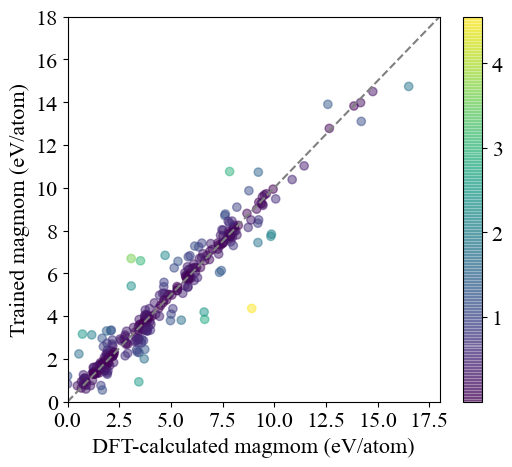

In [22]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(0, 18, 100)
s_y = s_x
plt.scatter([ float(i) for i in y_train], cross_val_predict(model_ANN, X_train_s, y_train, cv = crossvalidation), alpha = 0.5,  
            c= abs([ float(i) for i in y_train]-cross_val_predict(model_ANN, X_train_s, y_train, cv = crossvalidation)))
plt.plot(s_x, s_y, color = 'grey')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated magmom (eV/atom)', fontsize = 16)
plt.ylabel('Trained magmom (eV/atom)', fontsize = 16)
plt.xlim(0, 18)
plt.ylim(0, 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
#plt.colorbar()
plt.savefig('train2.png', dpi = 300)
#plt.show()

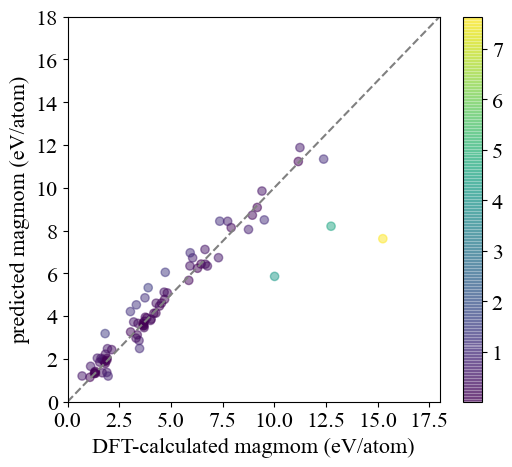

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(0, 18, 100)
s_y = s_x
plt.scatter([ float(i) for i in y_test], [ float(i) for i in y_ann_predict], alpha = 0.5,
           c= abs(np.array([ float(i) for i in y_test])-np.array([ float(i) for i in y_ann_predict])))
plt.plot(s_x, s_y, color = 'grey')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated magmom (eV/atom)', fontsize = 16)
plt.ylabel('predicted magmom (eV/atom)', fontsize = 16)
plt.xlim(0, 18)
plt.ylim(0, 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
#plt.colorbar()
plt.savefig('test2.png', dpi = 300)
#plt.show()